In [1]:
import pandas as pd
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
# import data in the form of html
URL = "https://en.wikipedia.org/wiki/Logistic_regression"
table_class = "wikitable sortable jquery-tablesorter"
response = requests.get(URL)


In [3]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
table= soup.find('table',{'class':"wikitable"})

In [4]:
#Read the table into a pandas dataframe
df = pd.read_html(str(table))
# convert list to dataframe
df = pd.DataFrame(df[0])
print(df.head())

           0    1     2    3     4    5     6     7    8     9   ...    11  \
0  Hours (xk)  0.5  0.75  1.0  1.25  1.5  1.75  1.75  2.0  2.25  ...  2.75   
1   Pass (yk)  0.0  0.00  0.0  0.00  0.0  0.00  1.00  0.0  1.00  ...  1.00   

    12    13   14   15    16   17    18   19   20  
0  3.0  3.25  3.5  4.0  4.25  4.5  4.75  5.0  5.5  
1  0.0  1.00  0.0  1.0  1.00  1.0  1.00  1.0  1.0  

[2 rows x 21 columns]


Text(0, 0.5, 'Pass')

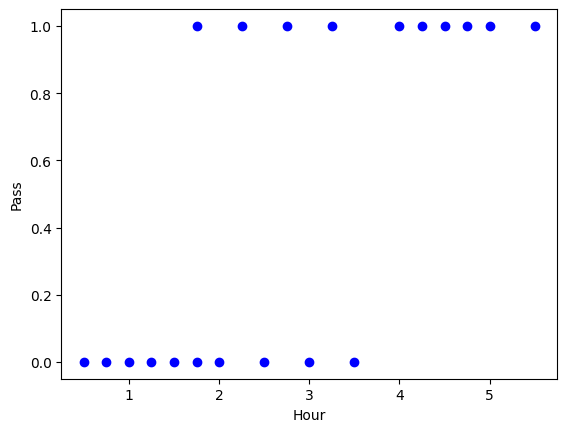

In [5]:
#Define the X and Y variables
Hour = df.iloc[0,1:len(df.columns)].values
Pass = df.iloc[1,1:len(df.columns)].values

#Plot the data
plt.plot(Hour,Pass,'bo')
plt.xlabel('Hour')
plt.ylabel('Pass')

In [6]:
#Transform the x-data into a integer array 
Pass = Pass.astype('int')
print(Pass)
#reshape the y-data to use in the logistic regression model 
Hour = Hour.reshape(-1,1)
print(Hour)

[0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1]
[[0.5]
 [0.75]
 [1.0]
 [1.25]
 [1.5]
 [1.75]
 [1.75]
 [2.0]
 [2.25]
 [2.5]
 [2.75]
 [3.0]
 [3.25]
 [3.5]
 [4.0]
 [4.25]
 [4.5]
 [4.75]
 [5.0]
 [5.5]]


In [15]:
#Define the model and fit the data
regression = LogisticRegression()
regression.fit(Hour, Pass)

#Get the parameters of the model
beta_0 = regression.intercept_
beta_1 = regression.coef_
print(beta_0, beta_1)

[-3.13952411] [[1.14860386]]


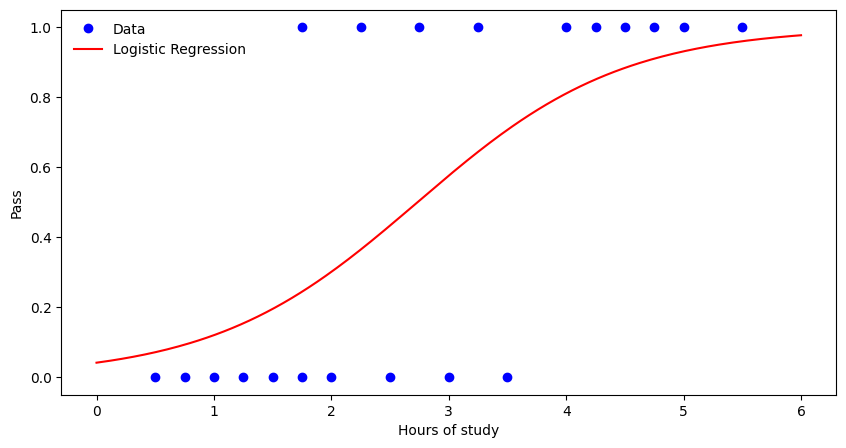

In [25]:
#Plot the data with logistic regression model
plt.figure(figsize=(10,5))
plt.plot(Hour, Pass, 'bo', label = 'Data')

# Create a domain to plot the sigmoid function
t = np.linspace(0, 6, 250)

#Create function
def sigmoid(x):
    sig = 1 / (1 + np.exp(-x))
    return sig

#Call function
r = sigmoid(t * beta_1 + beta_0).ravel()

#Plot the logistic regression function
plt.plot(x, r, color = 'red', label = 'Logistic Regression')
plt.xlabel('Hours of study')
plt.ylabel('Pass')
plt.legend(loc = 'upper left', frameon = False)

In [9]:
#Predict the passing condition for a given hour of study
test_hours = list(range(0,6))

#convert test_hours to array
def test_hours_to_array(test_hours):
    test_hours_array = np.array(test_hours).reshape(-1,1)
    return test_hours_array

test_hours_array = test_hours_to_array(test_hours)


In [10]:
#Predict passing the exam according to the model
predict = regression.predict(test_hours_array.reshape(-1,1))
regression_results = np.column_stack((test_hours, predict))

#Store results in Dataframe
Final_results = pd.DataFrame(regression_results, columns = ['Hours', 'Pass'])

#Create new column in dataframe to show the passing condition
def create_column(Final_results):
    Final_results['Condition'] = Final_results['Pass'].apply(lambda x: 'Fail' if x == 0 else 'Pass')
    return Final_results

Final_results = create_column(Final_results)
print(Final_results)

   Hours  Pass Condition
0      0     0      Fail
1      1     0      Fail
2      2     0      Fail
3      3     1      Pass
4      4     1      Pass
5      5     1      Pass


In [11]:
#Calculate the probability of passing the exam
p = sigmoid(test_hours * beta_1 + beta_0).ravel()
print(p)

[0.04150605 0.12015954 0.30104715 0.57597882 0.81075008 0.93108619]


Text(0, 0.5, 'Logit = log(P/(1-P))')

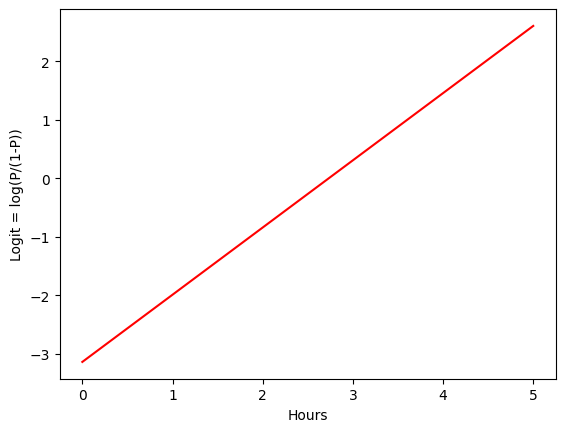

In [27]:
#Plot the log of odds of passing the exam
logit = np.log(p/(1-p))
plt.plot(test_hours, logit, color = 'red')
plt.xlabel('Hours')
plt.ylabel('Logit = log(P/(1-P))')